<a href="https://colab.research.google.com/github/Laxmikurapati/Machine-learning-Projects/blob/main/Exploratory_data_analysis_on_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import chardet
with open('/content/globalterrorismdb_0718dist.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [ ]:
df=pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [ ]:
df.shape

(181691, 135)

In [ ]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
df.shape

(181691, 135)

In [ ]:
x=df[['attacktype1_txt','iyear','imonth','region_txt','latitude','longitude','targtype1_txt','property','provstate','targtype2_txt','motive','weaptype1_txt','nwound','nkill','country_txt']]

In [ ]:
x

attacktype1_txt  iyear  imonth  \
0                        Assassination   1970       7   
1          Hostage Taking (Kidnapping)   1970       0   
2                        Assassination   1970       1   
3                    Bombing/Explosion   1970       1   
4       Facility/Infrastructure Attack   1970       1   
...                                ...    ...     ...   
181686                   Armed Assault   2017      12   
181687               Bombing/Explosion   2017      12   
181688  Facility/Infrastructure Attack   2017      12   
181689               Bombing/Explosion   2017      12   
181690               Bombing/Explosion   2017      12   

                         region_txt   latitude   longitude  \
0       Central America & Caribbean  18.456792  -69.951164   
1                     North America  19.371887  -99.086624   
2                    Southeast Asia  15.478598  120.599741   
3                    Western Europe  37.997490   23.762728   
4                         East Asia  33.580412  130.396361   
...                             ...        ...         ...   
181686           Sub-Saharan Africa   2.359673   45.385034   
181687   Middle East & North Africa  35.407278   35.942679   
181688               Southeast Asia   6.900742  124.437908   
181689                   South Asia  24.798346   93.940430   
181690               Southeast Asia   7.209594  124.241966   

                      targtype1_txt  property        provstate targtype2_txt  \
0       Private Citizens & Property         0              NaN           NaN   
1           Government (Diplomatic)         0          Federal           NaN   
2               Journalists & Media         0           Tarlac           NaN   
3           Government (Diplomatic)         1           Attica           NaN   
4           Government (Diplomatic)         1          Fukouka           NaN   
...                             ...       ...              ...           ...   
181686                     Military        -9  Middle Shebelle           NaN   
181687                     Military         1         Lattakia           NaN   
181688  Private Citizens & Property         1      Maguindanao           NaN   
181689         Government (General)        -9          Manipur           NaN   
181690                      Unknown         0      Maguindanao           NaN   

       motive weaptype1_txt  nwound  nkill         country_txt  
0         NaN       Unknown     0.0    1.0  Dominican Republic  
1         NaN       Unknown     0.0    0.0              Mexico  
2         NaN       Unknown     0.0    1.0         Philippines  
3         NaN    Explosives     NaN    NaN              Greece  
4         NaN    Incendiary     NaN    NaN               Japan  
...       ...           ...     ...    ...                 ...  
181686    NaN      Firearms     2.0    1.0             Somalia  
181687    NaN    Explosives     7.0    2.0               Syria  
181688    NaN    Incendiary     0.0    0.0         Philippines  
181689    NaN    Explosives     0.0    0.0               India  
181690    NaN    Explosives     0.0    0.0         Philippines  

[181691 rows x 15 columns]

In [ ]:
x.isnull().sum()


attacktype1_txt         0
iyear                   0
imonth                  0
region_txt              0
latitude             4556
longitude            4557
targtype1_txt           0
property                0
provstate             421
targtype2_txt      170547
motive             131130
weaptype1_txt           0
nwound              16311
nkill               10313
country_txt             0
dtype: int64

In [ ]:
df.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity  ...     ransomamt   ransomamtus  \
count  1.771340e+05  181685.000000  ...  1.350000e+03  5.630000e+02   
mean  -4.586957e+02       1.451452  ...  3.172530e+06  5.784865e+05   
std    2.047790e+05       0.995430  ...  3.021157e+07  7.077924e+06   
min   -8.618590e+07       1.000000  ... -9.900000e+01 -9.900000e+01   
25%    4.545640e+00       1.000000  ...  0.000000e+00  0.000000e+00   
50%    4.324651e+01       1.000000  ...  1.500000e+04  0.000000e+00   
75%    6.871033e+01       1.000000  ...  4.000000e+05  0.000000e+00   
max    1.793667e+02       5.000000  ...  1.000000e+09  1.320000e+08   

         ransompaid  ransompaidus  hostkidoutcome     nreleased  \
count  7.740000e+02    552.000000    10991.000000  10400.000000   
mean   7.179437e+05    240.378623        4.629242    -29.018269   
std    1.014392e+07   2940.967293        2.035360     65.720119   
min   -9.900000e+01    -99.000000        1.000000    -99.000000   
25%   -9.900000e+01      0.000000        2.000000    -99.000000   
50%    0.000000e+00      0.000000        4.000000      0.000000   
75%    1.273412e+03      0.000000        7.000000      1.000000   
max    2.750000e+08  48000.000000        7.000000   2769.000000   

             INT_LOG       INT_IDEO       INT_MISC        INT_ANY  
count  181691.000000  181691.000000  181691.000000  181691.000000  
mean       -4.543731      -4.464398       0.090010      -3.945952  
std         4.543547       4.637152       0.568457       4.691325  
min        -9.000000      -9.000000      -9.000000      -9.000000  
25%        -9.000000      -9.000000       0.000000      -9.000000  
50%        -9.000000      -9.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 77 columns]

In [ ]:
x.columns.values

array(['attacktype1_txt', 'iyear', 'imonth', 'region_txt', 'latitude',
       'longitude', 'targtype1_txt', 'property', 'provstate',
       'targtype2_txt', 'motive', 'weaptype1_txt', 'nwound', 'nkill',
       'country_txt'], dtype=object)

In [ ]:
x=x.rename(columns={'attacktype1_txt':'AttackType','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'State','targtype1_txt':'TargetType','nwound':'Wounded','nkill':"Killed"})
x

AttackType  Year  Month  \
0                        Assassination  1970      7   
1          Hostage Taking (Kidnapping)  1970      0   
2                        Assassination  1970      1   
3                    Bombing/Explosion  1970      1   
4       Facility/Infrastructure Attack  1970      1   
...                                ...   ...    ...   
181686                   Armed Assault  2017     12   
181687               Bombing/Explosion  2017     12   
181688  Facility/Infrastructure Attack  2017     12   
181689               Bombing/Explosion  2017     12   
181690               Bombing/Explosion  2017     12   

                             Region   latitude   longitude  \
0       Central America & Caribbean  18.456792  -69.951164   
1                     North America  19.371887  -99.086624   
2                    Southeast Asia  15.478598  120.599741   
3                    Western Europe  37.997490   23.762728   
4                         East Asia  33.580412  130.396361   
...                             ...        ...         ...   
181686           Sub-Saharan Africa   2.359673   45.385034   
181687   Middle East & North Africa  35.407278   35.942679   
181688               Southeast Asia   6.900742  124.437908   
181689                   South Asia  24.798346   93.940430   
181690               Southeast Asia   7.209594  124.241966   

                         TargetType  property            State targtype2_txt  \
0       Private Citizens & Property         0              NaN           NaN   
1           Government (Diplomatic)         0          Federal           NaN   
2               Journalists & Media         0           Tarlac           NaN   
3           Government (Diplomatic)         1           Attica           NaN   
4           Government (Diplomatic)         1          Fukouka           NaN   
...                             ...       ...              ...           ...   
181686                     Military        -9  Middle Shebelle           NaN   
181687                     Military         1         Lattakia           NaN   
181688  Private Citizens & Property         1      Maguindanao           NaN   
181689         Government (General)        -9          Manipur           NaN   
181690                      Unknown         0      Maguindanao           NaN   

       motive weaptype1_txt  Wounded  Killed             Country  
0         NaN       Unknown      0.0     1.0  Dominican Republic  
1         NaN       Unknown      0.0     0.0              Mexico  
2         NaN       Unknown      0.0     1.0         Philippines  
3         NaN    Explosives      NaN     NaN              Greece  
4         NaN    Incendiary      NaN     NaN               Japan  
...       ...           ...      ...     ...                 ...  
181686    NaN      Firearms      2.0     1.0             Somalia  
181687    NaN    Explosives      7.0     2.0               Syria  
181688    NaN    Incendiary      0.0     0.0         Philippines  
181689    NaN    Explosives      0.0     0.0               India  
181690    NaN    Explosives      0.0     0.0         Philippines  

[181691 rows x 15 columns]

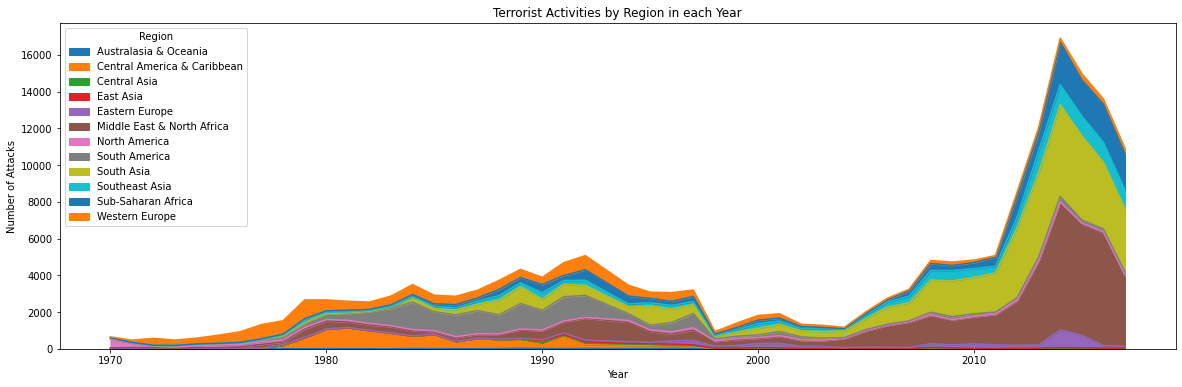

In [ ]:
pd.crosstab(x.Year,x.Region).plot(kind='area',figsize=((20,6)))
plt.title("Terrorist Activities by Region in each Year")
plt.ylabel('Number of Attacks')
plt.show()

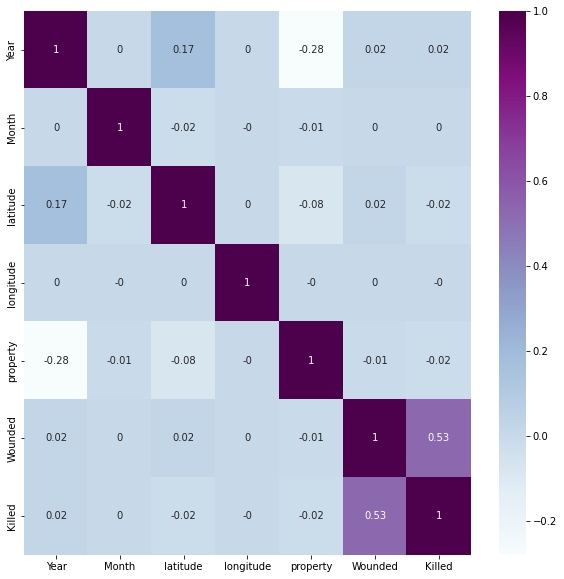

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=((10,10)))
sns.heatmap(np.round(x.corr(),2),annot=True,cmap='BuPu')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



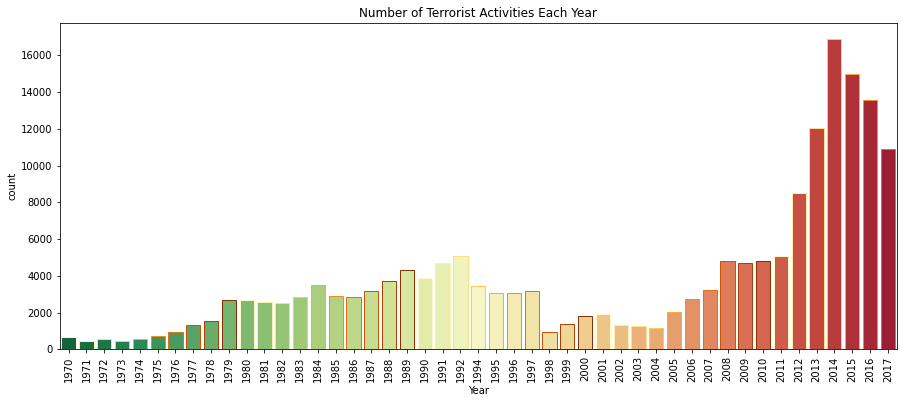

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=x,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr",10))
plt.xticks(rotation=90)
plt.title("Number of Terrorist Activities Each Year")
plt.show()

In [ ]:
import plotly.express as px
px.scatter(x,x.Wounded,x.Killed,hover_name='Country',animation_frame='Year',animation_group='Country',color='AttackType',range_color=[0,1],labels={'Killed':'Deaths','Wounded':'Casualities'},title="Number of casualities vs Killed people in each country for each year")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



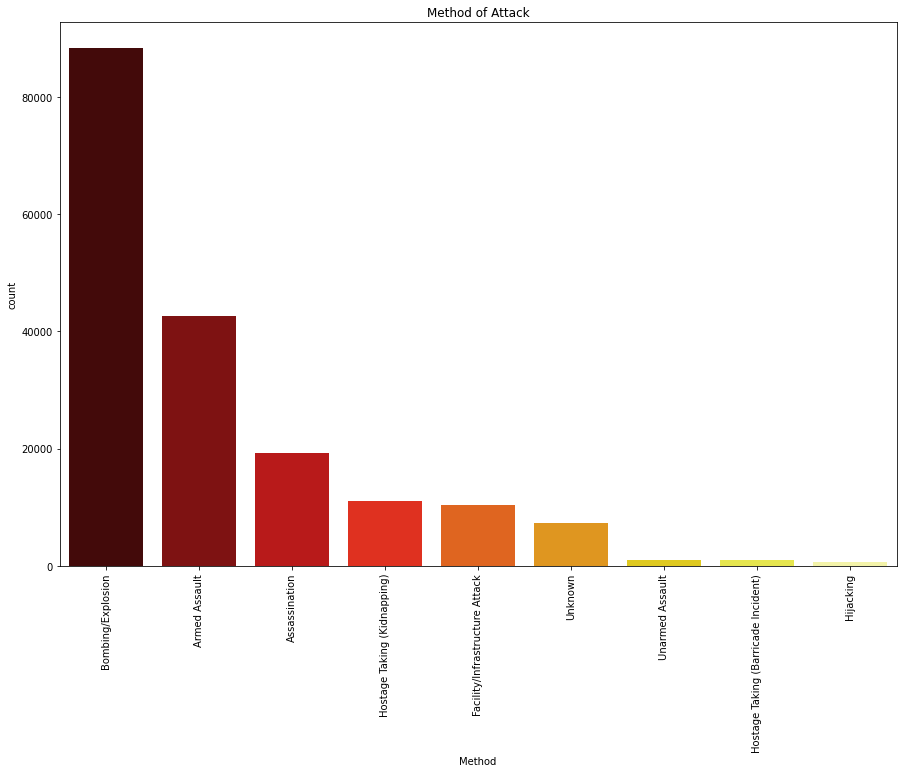

In [ ]:

plt.figure(figsize=(15,10))
sns.countplot(x['AttackType'],order=x['AttackType'].value_counts().index,palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



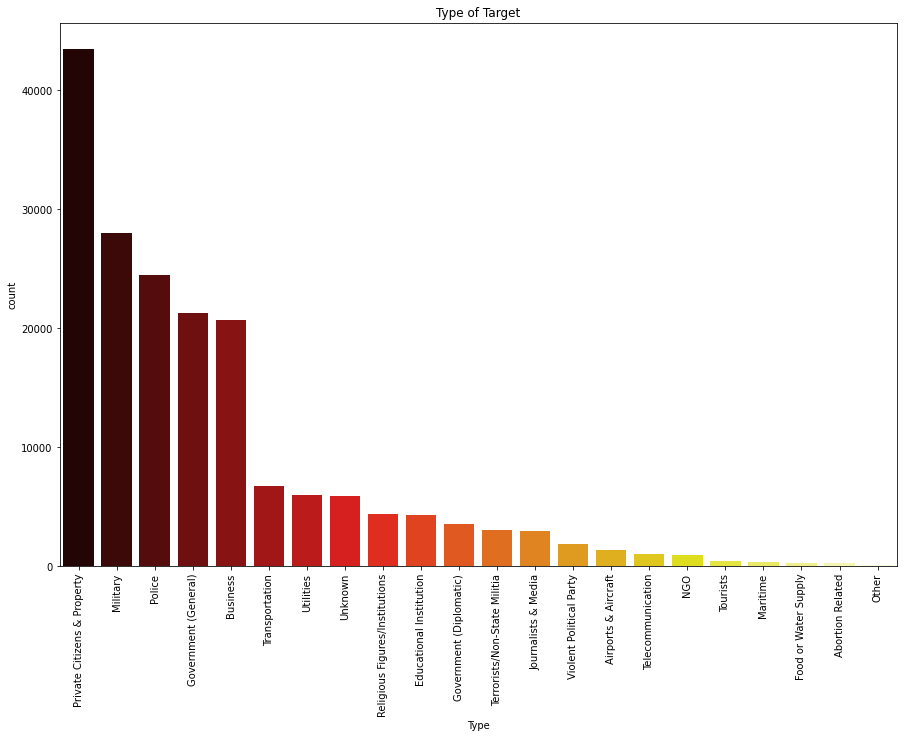

In [ ]:

plt.figure(figsize=(15,10))
sns.countplot(x['TargetType'],order=x['TargetType'].value_counts().index,palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Type of Target')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



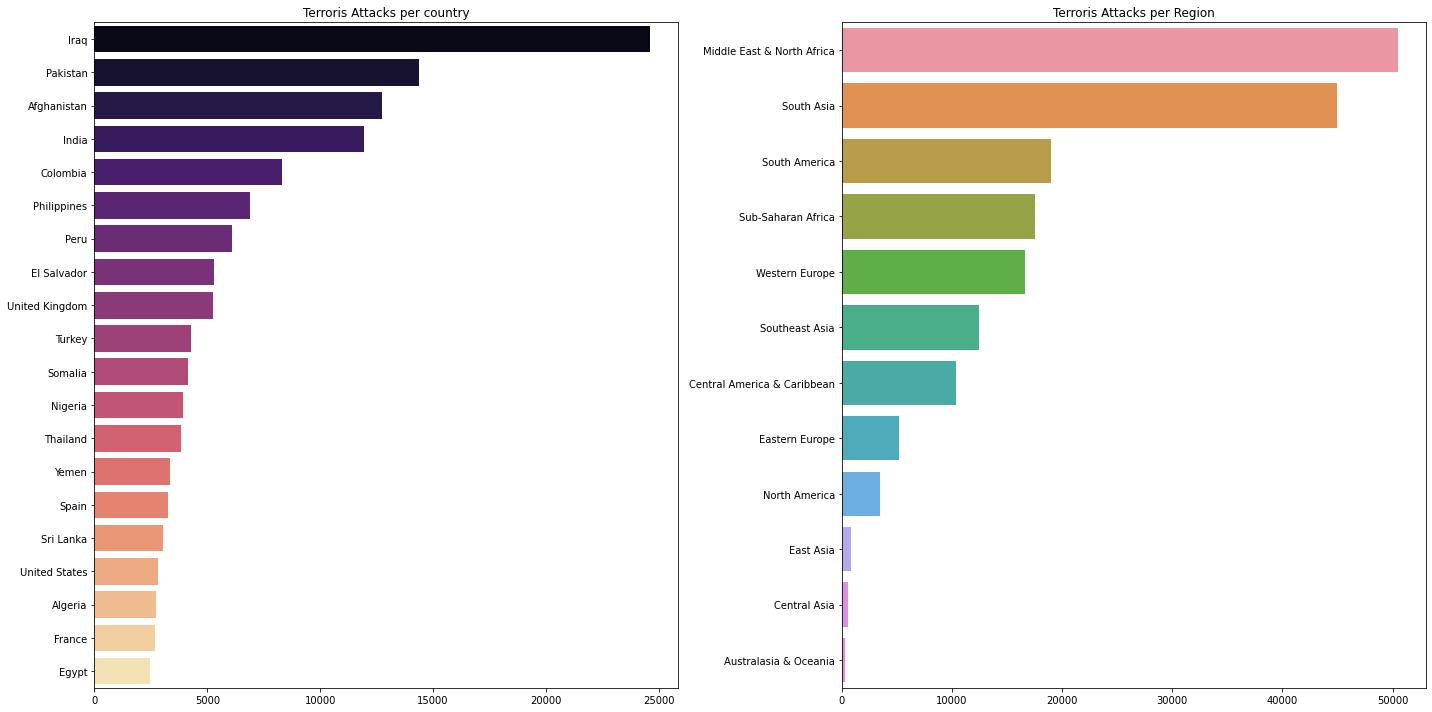

In [ ]:
fig,axes=plt.subplots(figsize=(20,10),nrows=1,ncols=2)
sns.barplot(x['Country'].value_counts()[:20].values,y=x['Country'].value_counts()[:20].index,ax=axes[0],palette='magma')
axes[0].set_title("Terroris Attacks per country")
sns.barplot(x['Region'].value_counts()[:20].values,y=x['Region'].value_counts()[:20].index,ax=axes[1])
axes[1].set_title("Terroris Attacks per Region")
fig.tight_layout()
plt.show()
# sns.barplot(x=x['country'].value_counts()[:30].values,y=x['country'].value_counts()[:30].index,palette='magma')

In [ ]:
# terr=x.groupby(['Country'],as_index=False).count()

In [ ]:
# fig=px.choropleth(terr,locations='Country',locationmode='country names',color='Year',hover_name='Country',projection='orthographic',title='Total Number of Attacks',labels={'Year':'Attacks'})
# fig.show()

In [ ]:
#Conclusion on Basis of EDA are:
# 1)Year 2015 and 2016 as highest Terrorist attack
# 2)Bombing and Explosition is the Highest method of attack
# 3)private citizens and property are mostly targeted 
# 4)Iraq country as highest Attack 
# 5)Middle East and North Africa Region as Highest Terrorist attack